# Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from datetime import datetime, timedelta
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from itertools import product
import plotly.graph_objects as go
from tabulate import tabulate
# suppress all warnings
import warnings
warnings.filterwarnings("ignore")


# Read the crime data csv file

In [2]:
from google.colab import files
upload=files.upload()

Saving daily crime numbers and weather data for time series analysis 1.csv to daily crime numbers and weather data for time series analysis 1.csv


# Explore the crime data

In [3]:
#data = pd.read_csv('/content/daily crime numbers and weather data for time series analysis.csv')
data = pd.read_csv('/content/daily crime numbers and weather data for time series analysis 1.csv')
data.head()
#data.tail()

,date,Kidnapping/Abduction,"Sex Offenses, Forcible",Robbery,Assault Offenses,Arson,Extortion/Blackmail,Burglary/Breaking & Entering,Larceny/Theft Offenses,Motor Vehicle Theft,...,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2010-01-01,0,13,31,58,0,0,77,215,21,...,174.8,15.0,7.0,07:16:59,17:33:24,0.53,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,7224301..."
1,2010-01-02,0,2,32,15,0,0,67,200,28,...,86.5,7.4,4.0,07:11:23,17:59:08,0.58,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"KHOU,72059400188,KIAH,KMCJ,72244012918,7224301..."
2,2010-01-03,0,0,38,35,0,0,52,179,35,...,179.6,15.5,8.0,06:47:10,18:20:48,0.53,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"KHOU,72059400188,KIAH,KMCJ,72244012918,7224301..."
3,2010-01-04,0,1,24,25,0,0,94,211,29,...,296.8,25.9,10.0,07:10:50,19:40:10,0.58,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,7224301..."
4,2010-01-05,0,3,19,22,0,0,88,183,20,...,307.1,26.5,10.0,06:38:56,19:58:34,0.60,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KHOU,72059400188,KIAH,KMCJ,72244012918,7224301..."


In [4]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   date                                       4960 non-null   object 
 1   Kidnapping/Abduction                       4960 non-null   int64  
 2   Sex Offenses, Forcible                     4960 non-null   int64  
 3   Robbery                                    4960 non-null   int64  
 4   Assault Offenses                           4960 non-null   int64  
 5   Arson                                      4960 non-null   int64  
 6   Extortion/Blackmail                        4960 non-null   int64  
 7   Burglary/Breaking & Entering               4960 non-null   int64  
 8   Larceny/Theft Offenses                     4960 non-null   int64  
 9   Motor Vehicle Theft                        4960 non-null   int64  
 10  Counterfeiting/Forgery  

(4960, 74)

# Split the data into Train and Test sets

In [5]:
# Define the date for splitting data into train and test sets
split_date = '2022-01-01'

# Create training and testing datasets
train_data = data[data['date'] < split_date]
test_data = data[data['date'] >= split_date]


# Fit the SARIMA model to the Train set - Assault Offenses

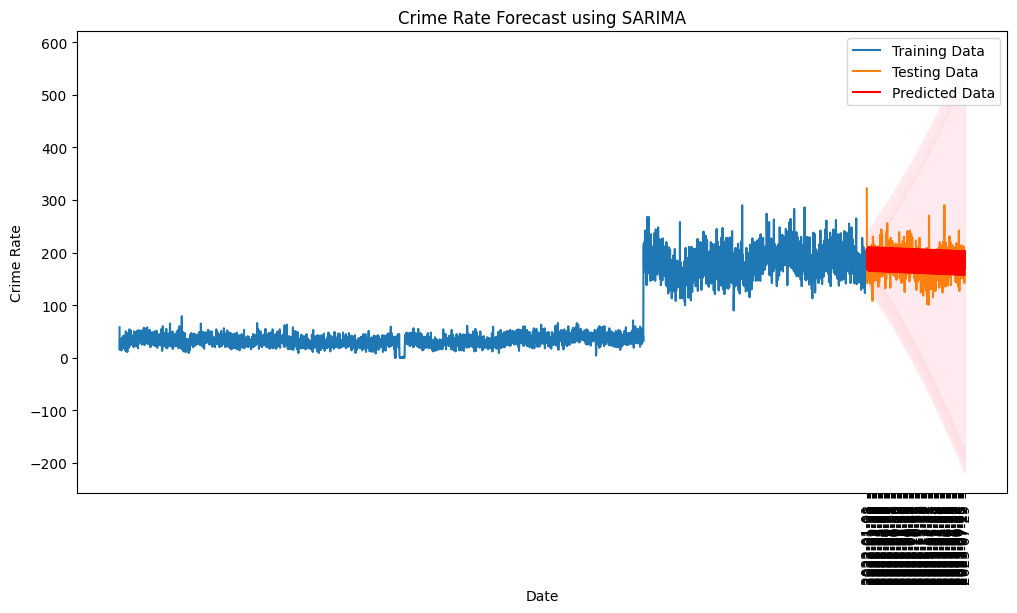

In [44]:
# Define the target variable (daily crime rate)
target = 'Assault Offenses'  # You can replace this with the desired crime category

# Fit SARIMA model
order = (1, 1, 1)  # Replace with appropriate values
seasonal_order = (1, 1, 1, 7)  # Replace with appropriate values

model = SARIMAX(train_data[target], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Make predictions
forecast = results.get_forecast(steps=len(test_data))
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data['date'], train_data[target], label='Training Data')
plt.plot(test_data['date'], test_data[target], label='Testing Data')
plt.plot(test_data['date'], predicted_values, label='Predicted Data', color='red')

# Add confidence intervals
plt.fill_between(test_data['date'], confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.title('Crime Rate Forecast using SARIMA')
plt.legend()

plt.xticks(test_data['date'][::7], rotation=90, size=10)

plt.show()

In [45]:


# Define the target variable (daily crime rate)
target = 'Assault Offenses'  # You can replace this with the desired crime category

# Fit SARIMA model
order = (1, 1, 1)  # Replace with appropriate values
seasonal_order = (1, 1, 1, 7)  # Replace with appropriate values

model = SARIMAX(train_data[target], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Make predictions
forecast = results.get_forecast(steps=len(test_data))
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a Plotly figure
fig = go.Figure()

# Add training data to the plot
fig.add_trace(go.Scatter(x=train_data['date'], y=train_data[target], mode='lines', name='Training Data'))

# Add testing data to the plot
fig.add_trace(go.Scatter(x=test_data['date'], y=test_data[target], mode='lines', name='Testing Data'))

# Add predicted data to the plot
fig.add_trace(go.Scatter(x=test_data['date'], y=predicted_values, mode='lines', name='Predicted Data', line=dict(color='red')))

# Add confidence intervals as a shaded area
fig.add_trace(go.Scatter(x=test_data['date'], y=confidence_intervals.iloc[:, 0], fill=None, mode='lines', line=dict(color='pink')))
fig.add_trace(go.Scatter(x=test_data['date'], y=confidence_intervals.iloc[:, 1], fill='tonexty', mode='lines', line=dict(color='pink'), name='Confidence Intervals'))

# Customize the layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Crime Rate',
    title='Crime Rate Forecast using SARIMA',
    xaxis=dict(tickvals=test_data['date'][::7], tickangle=90, tickfont=dict(size=10)),
)

# Show the plot
fig.show()

## Note:  you can see the predicted data labels by zooming in

* The crime rate forcast plot above shows that the SARIMA model is able to accurately predict the crime rate.
* The plot also shows that the crime rate is increasing over time, which is a concerning trend.
* It is important to take steps to address the increase in crime rate. Some possible solutions include increasing the number of law enforcement officers in the area, or installing security cameras in strategic locations.

# Make predictions on the test set and evaluate the model of all the data (2010 - 2023)

In [46]:

# Calculate model predictions on the test data
test_predictions = forecast.predicted_mean

# Calculate evaluation metrics
mae = mean_absolute_error(test_data[target], test_predictions)
mse = mean_squared_error(test_data[target], test_predictions)
rmse = np.sqrt(mse)

r2 = r2_score(test_data[target], test_predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Absolute Error (MAE): 17.40
Mean Squared Error (MSE): 515.74
Root Mean Squared Error (RMSE): 22.71
R-squared (R2): 0.34


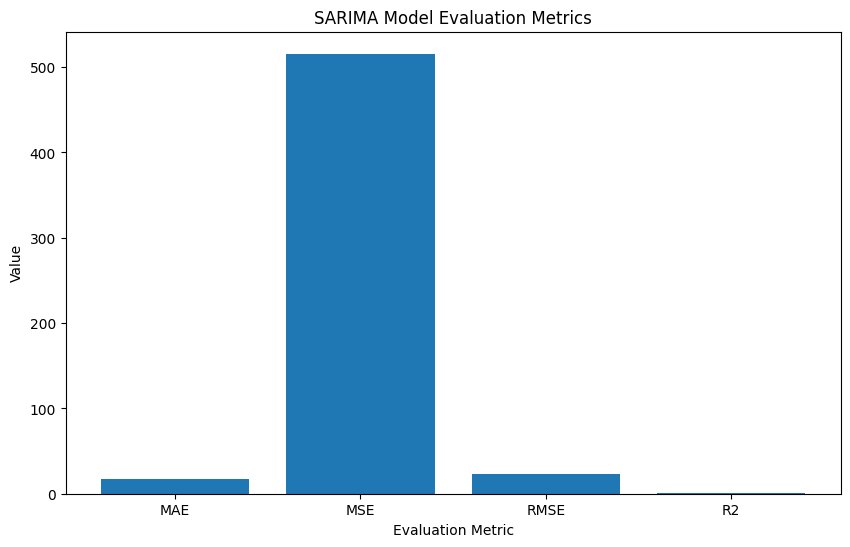

In [47]:
# Create a bar chart of the evaluation metrics
plt.figure(figsize=(10, 6))
plt.bar(['MAE', 'MSE', 'RMSE', 'R2'], [mae, mse, rmse, r2])
plt.xlabel('Evaluation Metric')
plt.ylabel('Value')
plt.title('SARIMA Model Evaluation Metrics')
plt.show()

R-squared may need to be above 0.95 for a regression model to be considered reliable. In other domains, an R-squared of just 0.3 may be sufficient if there is extreme variability in the dataset.

# Find the best SARIMA Hyperparameters

In [48]:

# Define lists of potential values for order and seasonal_order
p = d = q = range(0, 2)
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(product(p, d, q))]

best_mae = float('inf')
best_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train_data[target], order=param, seasonal_order=param_seasonal)
            results = model.fit()
            forecast = results.get_forecast(steps=len(test_data))
            predicted_values = forecast.predicted_mean
            mae = mean_absolute_error(test_data[target], predicted_values)

            if mae < best_mae:
                best_mae = mae
                best_params = (param, param_seasonal)
        except:
            continue

print(f"Best MAE: {best_mae:.2f}")
print(f"Best SARIMA Parameters: {best_params}")


Best MAE: 17.40
Best SARIMA Parameters: ((1, 1, 1), (1, 1, 1, 7))


# Make Future Predictions using the best SARIMA model

SARIMA is a suitable model for handling time series data with seasonality and trend components that is often used to predict future values based on past data.

Besides SARIMA, several other time series forecasting models can be considered, depending on the specific characteristics of your crime rate data. Here are some alternative models to consider:

* Autoregressive Integrated Moving Average (ARIMA)
* Prophet
* Long Short-Term Memory (LSTM)
* Random Forests or Gradient Boosting



In [49]:
# Define the number of days into the future you want to predict
forecast_horizon = 200  # You can adjust this value

# Find the latest date in the dataset and convert it to a datetime object
latest_date_str = data['date'].max()
latest_date = datetime.strptime(latest_date_str, '%Y-%m-%d')

# Create a list of future dates
future_dates = [latest_date + timedelta(days=i) for i in range(1, forecast_horizon + 1)]

# Fit the SARIMA model on the entire dataset (including the test data)
final_model = SARIMAX(data[target], order=best_params[0], seasonal_order=best_params[1])
final_results = final_model.fit()

# Forecast future values
future_forecast = final_results.get_forecast(steps=forecast_horizon)
future_predictions = future_forecast.predicted_mean

# Print future dates and predictions
print("Future Predictions:")
for date, prediction in zip(future_dates, future_predictions):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Prediction: {prediction:.2f}")


Future Predictions:
Date: 2023-08-01, Prediction: 161.82
Date: 2023-08-02, Prediction: 162.80
Date: 2023-08-03, Prediction: 155.21
Date: 2023-08-04, Prediction: 166.54
Date: 2023-08-05, Prediction: 190.88
Date: 2023-08-06, Prediction: 202.53
Date: 2023-08-07, Prediction: 170.53
Date: 2023-08-08, Prediction: 162.27
Date: 2023-08-09, Prediction: 161.91
Date: 2023-08-10, Prediction: 155.82
Date: 2023-08-11, Prediction: 166.92
Date: 2023-08-12, Prediction: 190.11
Date: 2023-08-13, Prediction: 202.58
Date: 2023-08-14, Prediction: 170.32
Date: 2023-08-15, Prediction: 162.21
Date: 2023-08-16, Prediction: 161.79
Date: 2023-08-17, Prediction: 155.77
Date: 2023-08-18, Prediction: 166.85
Date: 2023-08-19, Prediction: 189.98
Date: 2023-08-20, Prediction: 202.50
Date: 2023-08-21, Prediction: 170.22
Date: 2023-08-22, Prediction: 162.13
Date: 2023-08-23, Prediction: 161.70
Date: 2023-08-24, Prediction: 155.69
Date: 2023-08-25, Prediction: 166.77
Date: 2023-08-26, Prediction: 189.89
Date: 2023-08-27, 

# Plot the Actual and Predicted crime rates

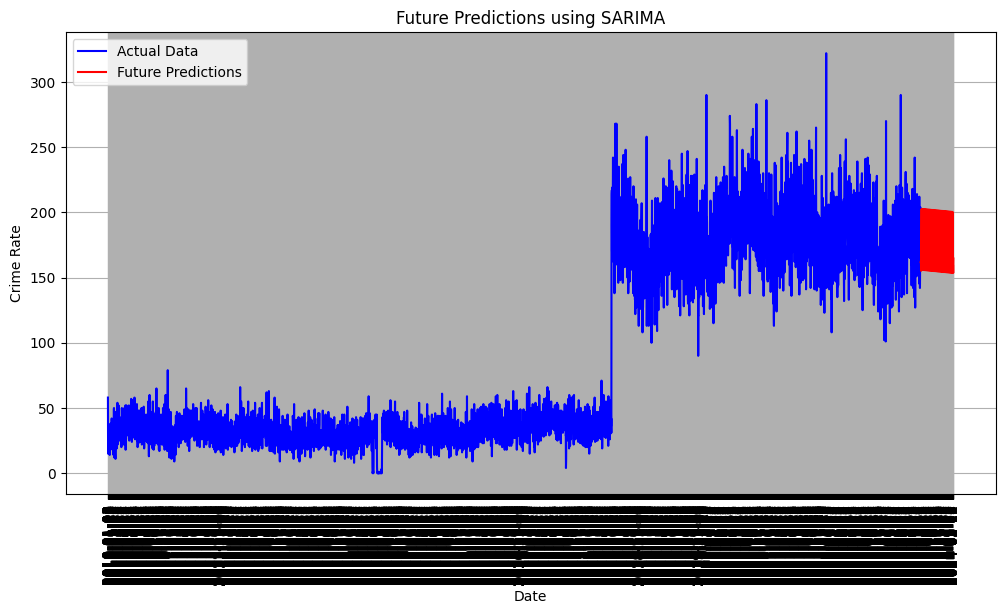

In [50]:
# Convert future dates to a list of strings
future_date_strings = [date.strftime('%Y-%m-%d') for date in future_dates]

# Plot the actual data
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data[target], label='Actual Data', color='blue')

# Plot the future predictions
plt.plot(future_date_strings, future_predictions, label='Future Predictions', color='red')

plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.title('Future Predictions using SARIMA')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90) #, size = 4)  # Rotate x-axis labels for better visibility
plt.show()


In [54]:
import pandas as pd
import datetime
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Convert future dates to a list of strings
future_date_strings = [date.strftime('%Y-%m-%d') for date in future_dates]

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'date': data['date'].tolist() + future_date_strings,
                          'Offense Count': data['Offense Count'].tolist() + future_predictions.tolist(),
                          'Type': ['Actual Data'] * len(data) + ['Future Predictions'] * forecast_horizon})

# Create the Plotly line plot
fig = px.line(plot_data, x='date', y='Offense Count', color='Type',
              labels={'date': 'Date', 'Offense Count': 'Crime Rate'},
              title='Future Predictions using SARIMA - 2010 to 2023')

# Customize the x-axis labels
fig.update_xaxes(categoryorder='total ascending', tickangle=90)

# Show the plot
fig.show()


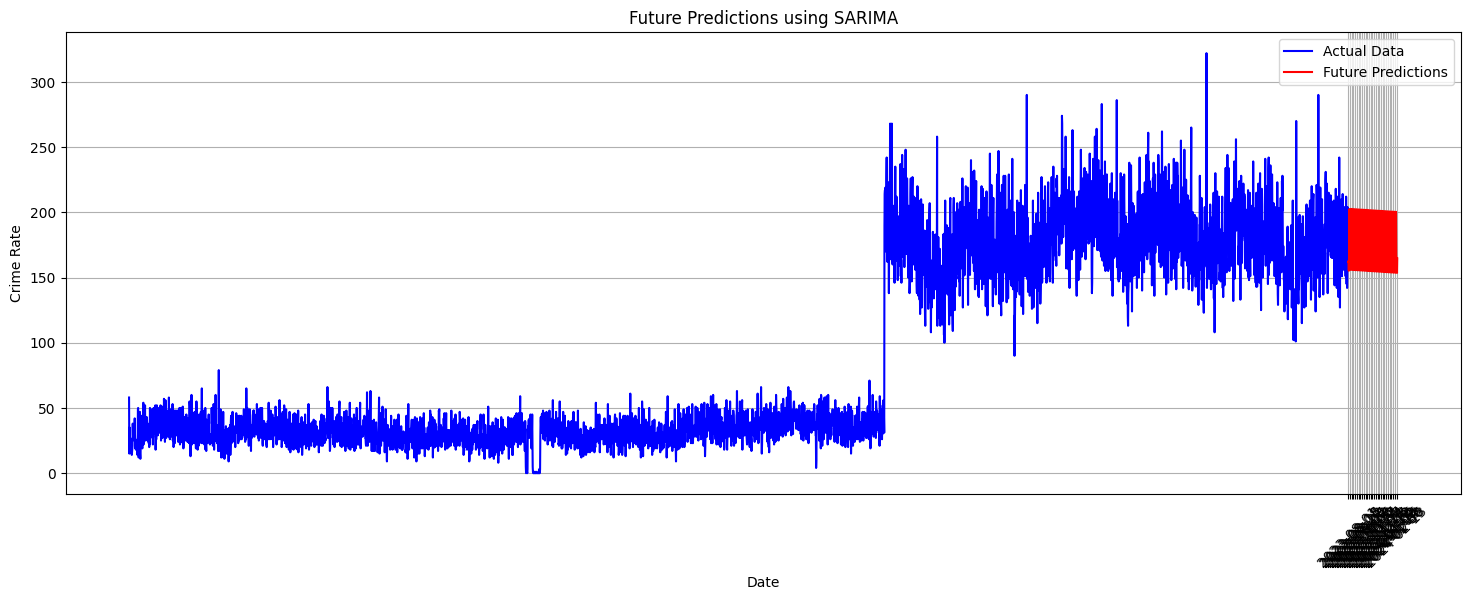

In [55]:
##

# Convert future dates to a list of strings
future_date_strings = [date.strftime('%Y-%m-%d') for date in future_dates]

# Plot the actual data
plt.figure(figsize=(18, 6))
plt.plot(data['date'], data[target], label='Actual Data', color='blue')

# Plot the future predictions
plt.plot(future_date_strings, future_predictions, label='Future Predictions', color='red')

plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.title('Future Predictions using SARIMA')
plt.legend()
plt.grid(True)

# Set x-axis ticks for better visibility (e.g., every 7 days)
plt.xticks(future_date_strings[::7], rotation=45, size=10)

plt.show()


# Monthly and Weekly crime forecast

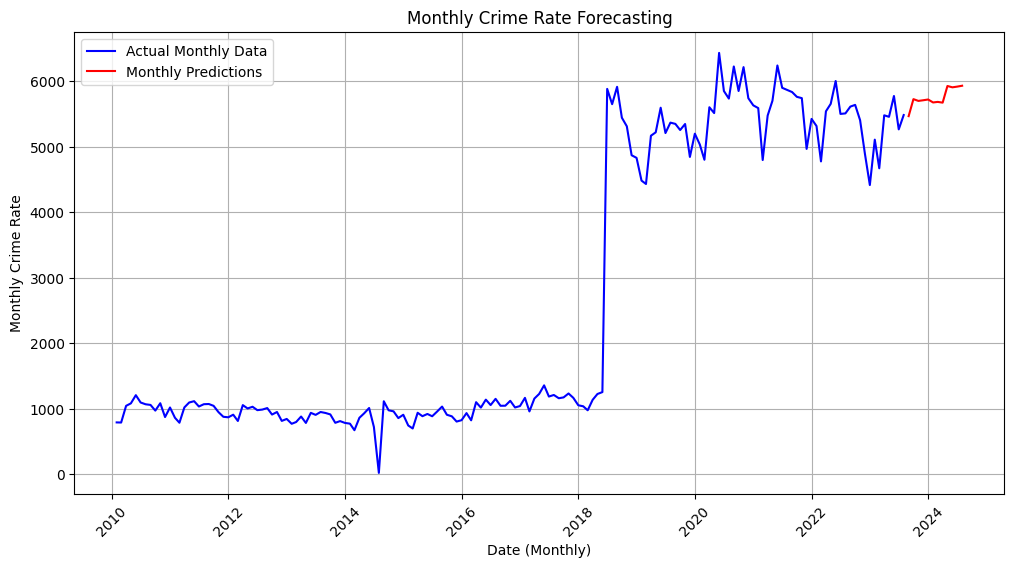

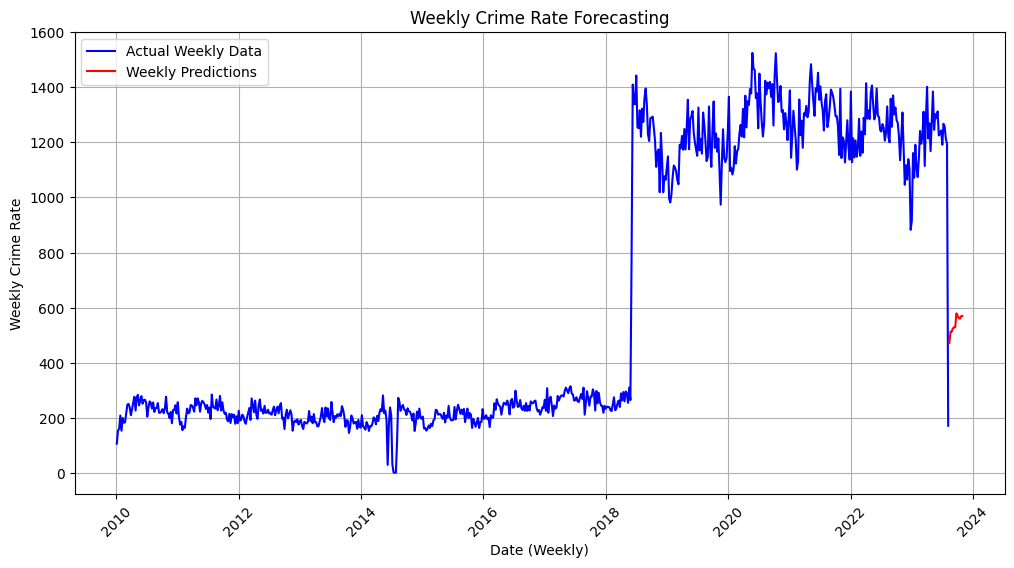

In [56]:
# Convert 'date' column to a datetime index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Resample the data to monthly frequency
monthly_data = data[target].resample('M').sum()

# Resample the data to weekly frequency
weekly_data = data[target].resample('W').sum()

# Define the forecast horizon
forecast_horizon = 12  # Number of months or weeks into the future

# Create future dates for monthly and weekly forecasts
future_dates_monthly = pd.date_range(start=monthly_data.index[-1], periods=forecast_horizon + 1, freq='M')[1:]
future_dates_weekly = pd.date_range(start=weekly_data.index[-1], periods=forecast_horizon + 1, freq='W')[1:]

# Fit the SARIMA model on the entire dataset (including the test data)
final_model_monthly = SARIMAX(monthly_data, order=best_params[0], seasonal_order=best_params[1])
final_results_monthly = final_model_monthly.fit()

final_model_weekly = SARIMAX(weekly_data, order=best_params[0], seasonal_order=best_params[1])
final_results_weekly = final_model_weekly.fit()

# Forecast future values for monthly and weekly data
future_forecast_monthly = final_results_monthly.get_forecast(steps=forecast_horizon)
future_predictions_monthly = future_forecast_monthly.predicted_mean

future_forecast_weekly = final_results_weekly.get_forecast(steps=forecast_horizon)
future_predictions_weekly = future_forecast_weekly.predicted_mean

# Plot monthly actual data and predictions
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data.values, label='Actual Monthly Data', color='blue')
plt.plot(future_dates_monthly, future_predictions_monthly, label='Monthly Predictions', color='red')

plt.xlabel('Date (Monthly)')
plt.ylabel('Monthly Crime Rate')
plt.title('Monthly Crime Rate Forecasting')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot weekly actual data and predictions
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data.values, label='Actual Weekly Data', color='blue')
plt.plot(future_dates_weekly, future_predictions_weekly, label='Weekly Predictions', color='red')

plt.xlabel('Date (Weekly)')
plt.ylabel('Weekly Crime Rate')
plt.title('Weekly Crime Rate Forecasting')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



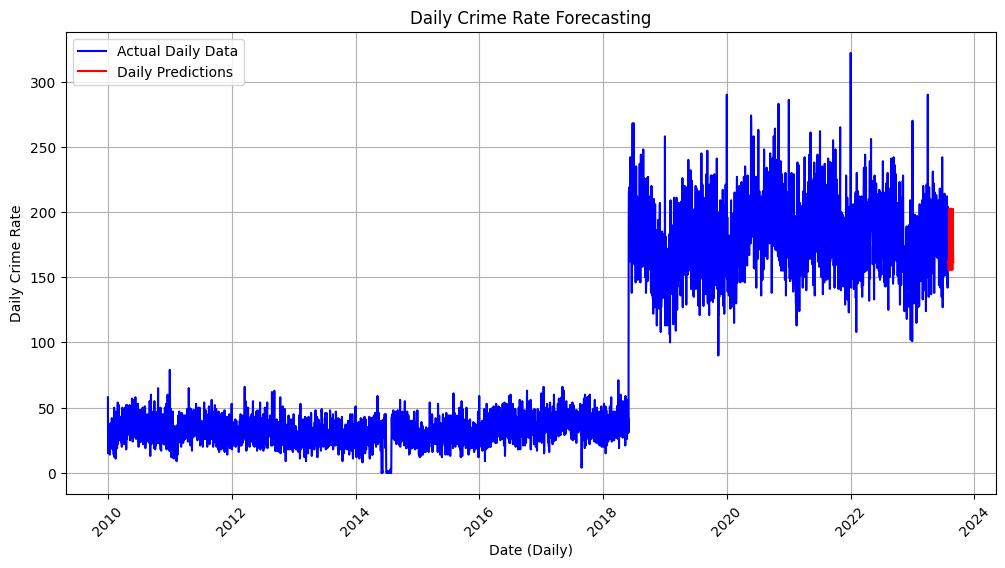

In [57]:
daily_data = data[target].resample('D').sum()
daily_forecast_horizon = 30  ## Number of days into the future
future_dates_daily = pd.date_range(start=daily_data.index[-1], periods=daily_forecast_horizon + 1, freq='D')[1:]
final_model_daily = SARIMAX(daily_data, order=best_params[0], seasonal_order=best_params[1])
final_results_daily = final_model_daily.fit()
future_forecast_daily = final_results_daily.get_forecast(steps=daily_forecast_horizon)
future_predictions_daily = future_forecast_daily.predicted_mean

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values, label='Actual Daily Data', color='blue')
plt.plot(future_dates_daily, future_predictions_daily, label='Daily Predictions', color='red')

plt.xlabel('Date (Daily)')
plt.ylabel('Daily Crime Rate')
plt.title('Daily Crime Rate Forecasting')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# Total crime count 'Offense Count' as the target

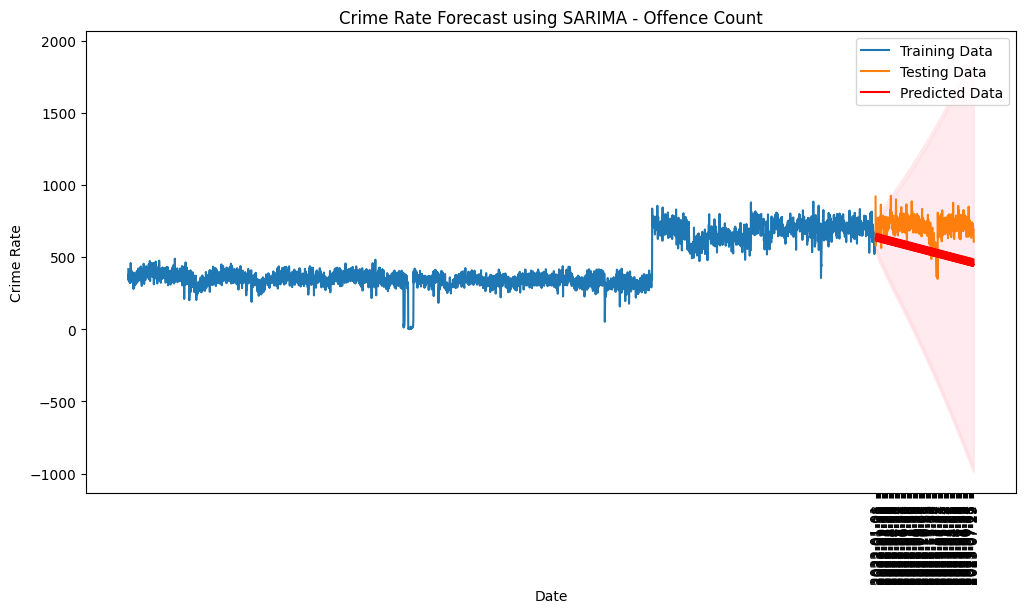

In [58]:
# Define the target variable (daily crime rate)
target = 'Offense Count'  # You can replace this with the desired crime category

# Fit SARIMA model
order = (1, 1, 1)  # Replace with appropriate values
seasonal_order = (1, 1, 1, 7)  # Replace with appropriate values

model = SARIMAX(train_data[target], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Make predictions
forecast = results.get_forecast(steps=len(test_data))
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data['date'], train_data[target], label='Training Data')
plt.plot(test_data['date'], test_data[target], label='Testing Data')
plt.plot(test_data['date'], predicted_values, label='Predicted Data', color='red')

# Add confidence intervals
plt.fill_between(test_data['date'], confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.title('Crime Rate Forecast using SARIMA - Offence Count')
plt.legend()


# Shorten the x-axis by setting the x-axis limits
#plt.xlim(test_data['date'][0], test_data['date'][-1])

# Set x-axis ticks for better visibility (e.g., every 7 days) and rotate labels
#plt.xticks(test_data['date'][::7], size = 10) #rotation=45)
plt.xticks(test_data['date'][::7], rotation=90, size=10)

plt.show()

In [59]:

# Define the target variable (daily crime rate)
target = 'Offense Count'  # You can replace this with the desired crime category

# Fit SARIMA model
order = (1, 1, 1)  # Replace with appropriate values
seasonal_order = (1, 1, 1, 7)  # Replace with appropriate values

model = SARIMAX(train_data[target], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Make predictions
forecast = results.get_forecast(steps=len(test_data))
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a Plotly figure
fig = go.Figure()

# Add training data to the plot
fig.add_trace(go.Scatter(x=train_data['date'], y=train_data[target], mode='lines', name='Training Data'))

# Add testing data to the plot
fig.add_trace(go.Scatter(x=test_data['date'], y=test_data[target], mode='lines', name='Testing Data'))

# Add predicted data to the plot
fig.add_trace(go.Scatter(x=test_data['date'], y=predicted_values, mode='lines', name='Predicted Data', line=dict(color='red')))

# Add confidence intervals as a shaded area
fig.add_trace(go.Scatter(x=test_data['date'], y=confidence_intervals.iloc[:, 0], fill=None, mode='lines', line=dict(color='pink')))
fig.add_trace(go.Scatter(x=test_data['date'], y=confidence_intervals.iloc[:, 1], fill='tonexty', mode='lines', line=dict(color='pink'), name='Confidence Intervals'))

# Customize the layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Crime Rate',
    title='Crime Rate Forecast using SARIMA - Offence Count',
    xaxis=dict(tickvals=test_data['date'][::7], tickangle=90, tickfont=dict(size=10)),
    legend=dict(x=0, y=1, xanchor='auto', yanchor='top'),   #xanchor='left'
    xaxis_showgrid=True, yaxis_showgrid = True,
    margin=dict(l=50, r=20, t=50, b=50),
    autosize=False,
    width=1200,
    height=600,  # Adjust the height as needed
)

# Show the plot
fig.show()


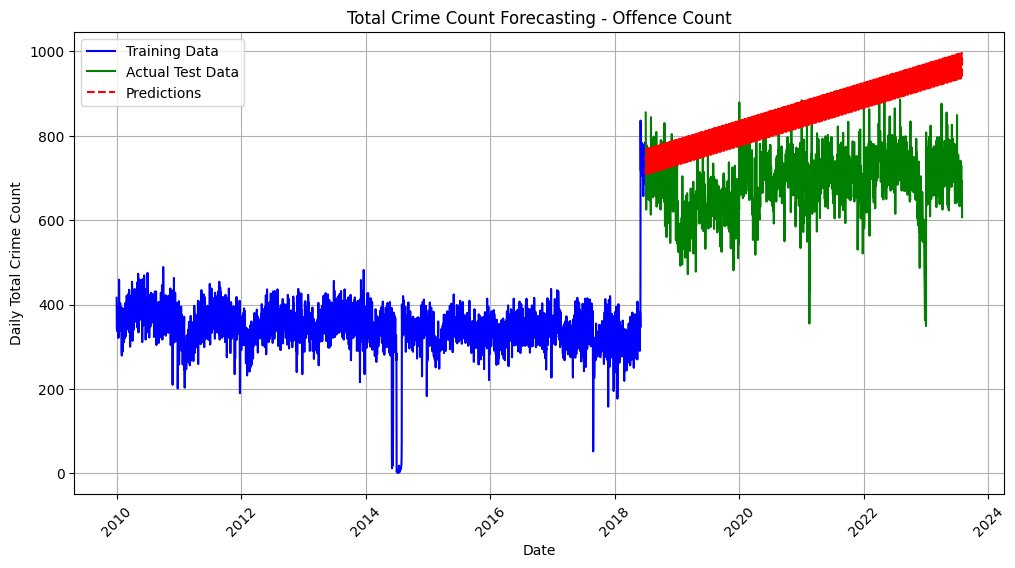

Mean Absolute Error (MAE): 169.69
                                     SARIMAX Results                                     
Dep. Variable:                     Offense Count   No. Observations:                 3103
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -15383.259
Date:                           Fri, 06 Oct 2023   AIC                          30776.518
Time:                                   17:51:22   BIC                          30806.706
Sample:                               01-01-2010   HQIC                         30787.359
                                    - 06-30-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2095      0.019     11.086      0.000       0.172       0.247
ma.L1    

In [64]:

# Extract the daily total crime count data
# total_crime_data = data[['date', 'Offense Count']].copy()

# Extract the daily total crime count data and set 'date' column as the index
total_crime_data = data.copy()
total_crime_data = total_crime_data.rename(columns={total_crime_data.columns[0]: 'date'})

# Convert 'date' column to datetime index and set it as the index
total_crime_data['date'] = pd.to_datetime(total_crime_data['date'])
total_crime_data.set_index('date', inplace=True)

# Split the data into train and test sets (considering the data gap)
train_end_date = '2018-06-30'  # End of the training data
#train_end_date = '2011-01-01'
train_data = total_crime_data[total_crime_data.index <= train_end_date]
test_data = total_crime_data[total_crime_data.index > train_end_date]

# Fit a SARIMA model
target = 'Offense Count'
model = SARIMAX(train_data[target], order=best_params[0], seasonal_order=best_params[1])
results = model.fit()

# Forecast future values
forecast_horizon = len(test_data)  # Forecast for the length of the test data
forecast = results.get_forecast(steps=forecast_horizon)
predictions = forecast.predicted_mean

# Calculate MAE for evaluation
mae = mean_absolute_error(test_data[target], predictions)

# Plot actual data and predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data[target], label='Training Data', color='blue')
plt.plot(test_data.index, test_data[target], label='Actual Test Data', color='green')
plt.plot(test_data.index, predictions, label='Predictions', color='red', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Daily Total Crime Count')
plt.title('Total Crime Count Forecasting - Offence Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Print the MAE and model summary
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(results.summary())


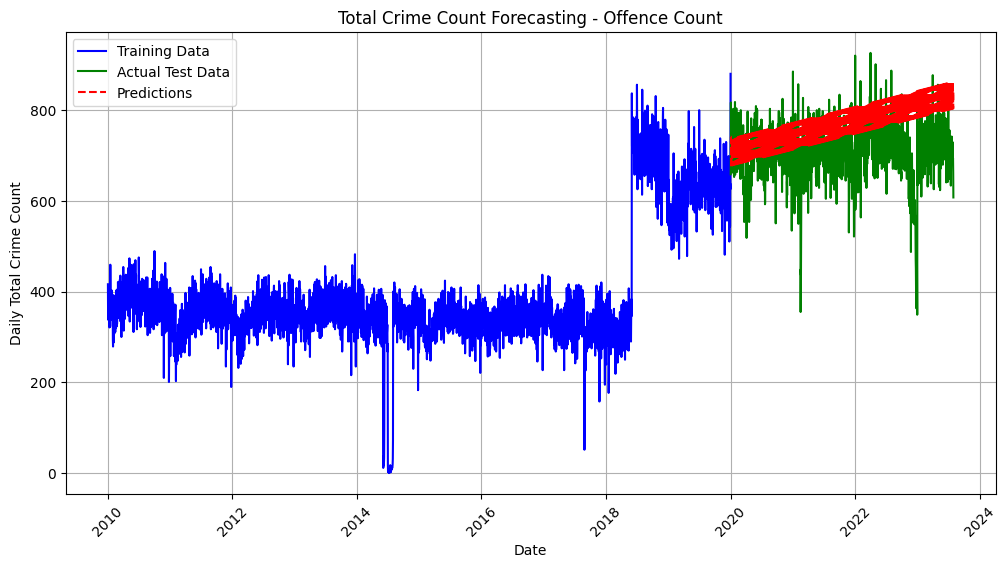

Mean Absolute Error (MAE): 75.78
                                     SARIMAX Results                                     
Dep. Variable:                     Offense Count   No. Observations:                 3653
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -18379.456
Date:                           Fri, 06 Oct 2023   AIC                          36768.912
Time:                                   17:53:08   BIC                          36799.917
Sample:                               01-01-2010   HQIC                         36779.954
                                    - 01-01-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2015      0.016     12.371      0.000       0.170       0.233
ma.L1     

In [65]:

# Extract the daily total crime count data and set 'date' column as the index
total_crime_data = data.copy()
total_crime_data = total_crime_data.rename(columns={total_crime_data.columns[0]: 'date'})

# Convert 'date' column to datetime index and set it as the index
total_crime_data['date'] = pd.to_datetime(total_crime_data['date'])
total_crime_data.set_index('date', inplace=True)

# Split the data into train and test sets (considering the data gap)
#train_end_date = '2018-06-30'  # End of the training data
train_end_date = '2020-01-01'
train_data = total_crime_data[total_crime_data.index <= train_end_date]
test_data = total_crime_data[total_crime_data.index > train_end_date]

# Fit a SARIMA model
target = 'Offense Count'
model = SARIMAX(train_data[target], order=best_params[0], seasonal_order=best_params[1])
results = model.fit()

# Forecast future values
forecast_horizon = len(test_data)  # Forecast for the length of the test data
forecast = results.get_forecast(steps=forecast_horizon)
predictions = forecast.predicted_mean

# Calculate MAE for evaluation
mae = mean_absolute_error(test_data[target], predictions)

# Plot actual data and predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data[target], label='Training Data', color='blue')
plt.plot(test_data.index, test_data[target], label='Actual Test Data', color='green')
plt.plot(test_data.index, predictions, label='Predictions', color='red', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Daily Total Crime Count')
plt.title('Total Crime Count Forecasting - Offence Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Print the MAE and model summary
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(results.summary())


In [ ]:
!pip install statsmodels --upgrade

In [ ]:
'''
pred = []
for i in range(len(test_data)):
  mod = SARIMAX(train_data, order=order )
  res = mod.fit()
  future = res.forecast()[0] # only use the first forecast result
  pred.append(future)
  train_data.append(test_data[i])
  error = mean_squared_error(test_data, pred)
  '''

In [67]:
# Xuan's code for Target = 'Offence Count'

# Load your data as a DataFrame
data_new = pd.read_csv('daily crime numbers and weather data for time series analysis.csv')

# Assuming you have a 'date' column in your DataFrame, parse it to datetime
data_new['date'] = pd.to_datetime(data_new['date'])

# Define the split date to separate train and test data
split_date = '2022-01-01'
#split_date = pd.to_datetime('your_split_date_here')  # Replace 'your_split_date_here' with the actual split date

# Split the data into training and test sets
train_data = data_new[data_new['date'] < split_date]
test_data = data_new[data_new['date'] >= split_date]

# Specify the order of the SARIMA model
order = (1, 1, 1)

# Create a list to store the predictions
pred = []

# Iterate over the test data
for i in range(len(test_data)):

    # Create a SARIMA model with the specified order and training data
    mod = SARIMAX(train_data['Offense Count'], order=order)

    # Fit the SARIMA model to the training data
    res = mod.fit()

    # Forecast the next value in the time series data
    future = res.forecast()

    # Add the forecast result to the list of predictions
    pred.append(future)

    # Append the next test data point to the training data
    train_data = train_data.append(test_data.iloc[i])

# Convert the list of predictions to a NumPy array
pred = np.array(pred)

# Extract the actual values from the test data
actual_values = test_data['Offense Count'].values

# Calculate the MSE between the test data and the predictions
error = mean_squared_error(actual_values, pred)

# Print the mean squared error
print('Mean squared error:', error)


Mean squared error: 2926.061807394531


In [68]:
# Xuan's code for Target = 'Assault Offenses'

# Load your data as a DataFrame
data_new = pd.read_csv('daily crime numbers and weather data for time series analysis.csv')

# Assuming you have a 'date' column in your DataFrame, parse it to datetime
data_new['date'] = pd.to_datetime(data_new['date'])

# Define the split date to separate train and test data
split_date = '2022-01-01'
#split_date = pd.to_datetime('your_split_date_here')  # Replace 'your_split_date_here' with the actual split date

# Split the data into training and test sets
train_data = data_new[data_new['date'] < split_date]
test_data = data_new[data_new['date'] >= split_date]

# Specify the order of the SARIMA model
order = (1, 1, 1)

# Create a list to store the predictions
pred = []

# Iterate over the test data
for i in range(len(test_data)):

    # Create a SARIMA model with the specified order and training data
    mod = SARIMAX(train_data['Assault Offenses'], order=order)

    # Fit the SARIMA model to the training data
    res = mod.fit()

    # Forecast the next value in the time series data
    future = res.forecast()

    # Add the forecast result to the list of predictions
    pred.append(future)

    # Append the next test data point to the training data
    train_data = train_data.append(test_data.iloc[i])

# Convert the list of predictions to a NumPy array
pred = np.array(pred)

# Extract the actual values from the test data
actual_values = test_data['Assault Offenses'].values

# Calculate the MSE between the test data and the predictions
error = mean_squared_error(actual_values, pred)

# Print the mean squared error
print('Mean squared error:', error)


Mean squared error: 665.8460919416951


# Split the data into Train/Test
* Train from June 2018 to Dec 2022
* Test from Jan 2023 to July 2023

In [69]:
# Convert the 'date' column to a datetime type if it's not already
data['date'] = pd.to_datetime(data['date'])

# Define the date range for training data
start_date_train = '2018-06-01'
end_date_train = '2022-12-31'

# Define the date range for testing data
start_date_test = '2023-01-01'
end_date_test = '2023-12-31'

# Create training and testing datasets
train_data = data[(data['date'] >= start_date_train) & (data['date'] <= end_date_train)]
test_data = data[(data['date'] >= start_date_test) & (data['date'] <= end_date_test)]


In [70]:
# Define the target variable (daily crime rate)
target = 'Assault Offenses'  # You can replace this with the desired crime category

# Fit SARIMA model
order = (1, 1, 1)  # Replace with appropriate values
seasonal_order = (1, 1, 1, 7)  # Replace with appropriate values

model = SARIMAX(train_data[target], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Make predictions
forecast = results.get_forecast(steps=len(test_data))
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a Plotly figure
fig = go.Figure()

# Add training data to the plot
fig.add_trace(go.Scatter(x=train_data['date'], y=train_data[target], mode='lines', name='Training Data'))

# Add testing data to the plot
fig.add_trace(go.Scatter(x=test_data['date'], y=test_data[target], mode='lines', name='Testing Data'))

# Add predicted data to the plot
fig.add_trace(go.Scatter(x=test_data['date'], y=predicted_values, mode='lines', name='Predicted Data', line=dict(color='red')))

# Add confidence intervals as a shaded area
fig.add_trace(go.Scatter(x=test_data['date'], y=confidence_intervals.iloc[:, 0], fill=None, mode='lines', line=dict(color='pink')))
fig.add_trace(go.Scatter(x=test_data['date'], y=confidence_intervals.iloc[:, 1], fill='tonexty', mode='lines', line=dict(color='pink'), name='Confidence Intervals'))

# Customize the layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Crime Rate',
    title='Crime Rate Forecast using SARIMA - June, 2018 to July, 2023',
    xaxis=dict(tickvals=test_data['date'][::7], tickangle=90, tickfont=dict(size=10)),
)

# Show the plot
fig.show()

## Note:  you can see the predicted data labels by zooming in

# Evaluation Metrics

In [71]:

# Calculate model predictions on the test data
test_predictions = forecast.predicted_mean

# Calculate evaluation metrics
mae = mean_absolute_error(test_data[target], test_predictions)
mse = mean_squared_error(test_data[target], test_predictions)
rmse = np.sqrt(mse)

r2 = r2_score(test_data[target], test_predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Absolute Error (MAE): 50.05
Mean Squared Error (MSE): 2955.12
Root Mean Squared Error (RMSE): 54.36
R-squared (R2): -3.33


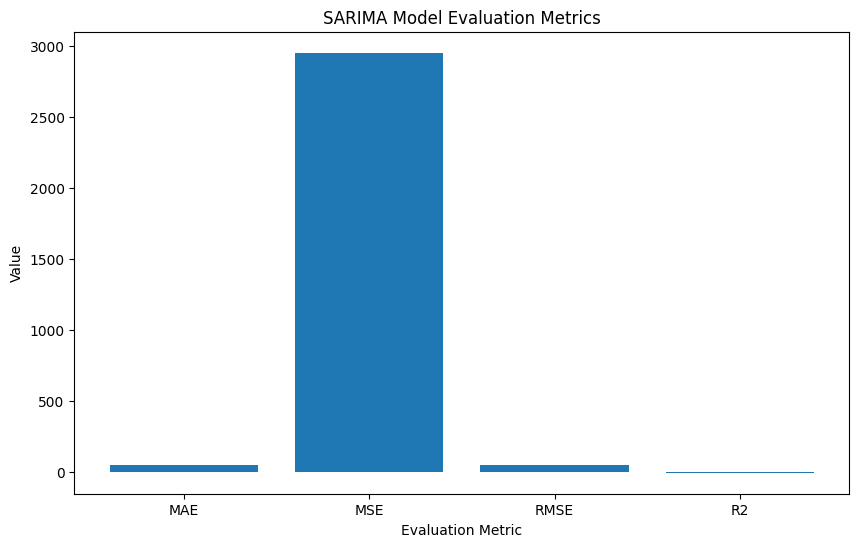

In [72]:
# Create a bar chart of the evaluation metrics
plt.figure(figsize=(10, 6))
plt.bar(['MAE', 'MSE', 'RMSE', 'R2'], [mae, mse, rmse, r2])
plt.xlabel('Evaluation Metric')
plt.ylabel('Value')
plt.title('SARIMA Model Evaluation Metrics')
plt.show()

# Hyperparameters for June 2018 - July 2023

In [73]:

# Define lists of potential values for order and seasonal_order
p = d = q = range(0, 2)
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(product(p, d, q))]

best_mae = float('inf')
best_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train_data[target], order=param, seasonal_order=param_seasonal)
            results = model.fit()
            forecast = results.get_forecast(steps=len(test_data))
            predicted_values = forecast.predicted_mean
            mae = mean_absolute_error(test_data[target], predicted_values)

            if mae < best_mae:
                best_mae = mae
                best_params = (param, param_seasonal)
        except:
            continue

print(f"Best MAE: {best_mae:.2f}")
print(f"Best SARIMA Parameters: {best_params}")


Best MAE: 17.74
Best SARIMA Parameters: ((1, 0, 1), (1, 1, 1, 7))


# Predictions June 2022 - July 2023

In [75]:
# Define the date range for training data
#start_date_train = '2018-06-01'
#end_date_train = '2022-12-31'

# Define the date range for testing data
#start_date_test = '2023-01-01'
#end_date_test = '2023-07-31'


# Load the data
#data = pd.read_csv('data.csv', parse_dates=['date'])

# Define the target variable (daily crime rate)
target = 'Assault Offenses'  # You can replace this with the desired crime category

# Check if the target variable exists in the DataFrame
if target not in data.columns:
    print(f"Error: '{target}' column not found in the data DataFrame.")
else:
    # Create training and testing datasets
    train_data_new = data[(data['date'] >= start_date_train) & (data['date'] <= end_date_train)]
    test_data_new = data[(data['date'] >= start_date_test) & (data['date'] <= end_date_test)]



# Fit SARIMA model
order = (1, 1, 1)  # Replace with appropriate values
seasonal_order = (1, 1, 1, 7)  # Replace with appropriate values

#model = SARIMAX(train_data[target], order=order, seasonal_order=seasonal_order)
#results = model.fit()


# Create training and testing datasets
#train_data_new = data[(data['date'] >= start_date_train) & (data['date'] <= end_date_train)]
#test_data_new = data[(data['date'] >= start_date_test) & (data['date'] <= end_date_test)]

# Define the number of days into the future you want to predict
forecast_horizon = 200  # You can adjust this value

# Find the latest date in the dataset and convert it to a string
latest_date_str = train_data_new['date'].max().strftime('%Y-%m-%d')

# Create a list of future dates
future_dates = [pd.to_datetime(latest_date_str) + pd.Timedelta(days=i) for i in range(1, forecast_horizon + 1)]

# Fit the SARIMA model on the entire dataset (including the test data)
final_model = SARIMAX(train_data_new[target], order=order, seasonal_order=seasonal_order)
final_results = final_model.fit()

# Forecast future values
future_forecast = final_results.get_forecast(steps=forecast_horizon)
future_predictions = future_forecast.predicted_mean

# Print future dates and predictions
print("Future Predictions:")
for date, prediction in zip(future_dates, future_predictions):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Prediction: {prediction:.2f}")


Future Predictions:
Date: 2023-01-01, Prediction: 153.93
Date: 2023-01-02, Prediction: 124.67
Date: 2023-01-03, Prediction: 116.71
Date: 2023-01-04, Prediction: 113.37
Date: 2023-01-05, Prediction: 113.73
Date: 2023-01-06, Prediction: 126.03
Date: 2023-01-07, Prediction: 144.76
Date: 2023-01-08, Prediction: 159.48
Date: 2023-01-09, Prediction: 125.78
Date: 2023-01-10, Prediction: 116.98
Date: 2023-01-11, Prediction: 113.74
Date: 2023-01-12, Prediction: 113.78
Date: 2023-01-13, Prediction: 127.42
Date: 2023-01-14, Prediction: 146.86
Date: 2023-01-15, Prediction: 159.59
Date: 2023-01-16, Prediction: 125.59
Date: 2023-01-17, Prediction: 116.74
Date: 2023-01-18, Prediction: 113.51
Date: 2023-01-19, Prediction: 113.53
Date: 2023-01-20, Prediction: 127.26
Date: 2023-01-21, Prediction: 146.74
Date: 2023-01-22, Prediction: 159.34
Date: 2023-01-23, Prediction: 125.33
Date: 2023-01-24, Prediction: 116.47
Date: 2023-01-25, Prediction: 113.24
Date: 2023-01-26, Prediction: 113.26
Date: 2023-01-27, 

In [76]:

# Convert future dates to a list of strings
future_date_strings = [date.strftime('%Y-%m-%d') for date in future_dates]

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'date': data['date'].tolist() + future_date_strings,
                          'Offense Count': data['Offense Count'].tolist() + future_predictions.tolist(),
                          'Type': ['Actual Data'] * len(data) + ['Future Predictions'] * forecast_horizon})

# Create the Plotly line plot
fig = px.line(plot_data, x='date', y='Offense Count', color='Type',
              labels={'date': 'Date', 'Offense Count': 'Crime Rate'},
              title='Future Predictions using SARIMA')

# Customize the x-axis labels
fig.update_xaxes(categoryorder='total ascending', tickangle=90)

# Show the plot
fig.show()


# Time Series Cross Validation

In [14]:

# Define the target variable (daily crime rate)
target = 'Assault Offenses' # Replace with your desired crime category


(p, d, q) = (1, 1, 1)
(P, D, Q, s) = (1, 1, 1, 7)


# Create a list to store the hyperparameters and corresponding MSE scores
mse_scores = []

# Perform Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Fit SARIMA model
model = SARIMAX(train_data[target], order=(p, d, q), seasonal_order=(P, D, Q, s))


# Calculate Mean Squared Error (MSE) on the training set
mse = model.fit().aic

# Append the MSE score to the list
mse_scores.append(mse)

# Print the MSE scores for all hyperparameter combinations
print(tscv)
print("MSE scores:")
for mse in mse_scores:
    print(mse)


TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
MSE scores:
35443.18544634024


In [19]:

# Define the target variable (daily crime rate)
target = 'Assault Offenses' # Replace with your desired crime category


(p, d, q) = (1, 0, 1)
(P, D, Q, s) = (1, 1, 1, 7)


# Create a list to store the hyperparameters and corresponding MSE scores
mse_scores = []

# Perform Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Fit SARIMA model
model = SARIMAX(train_data[target], order=(p, d, q), seasonal_order=(P, D, Q, s))


# Calculate Mean Squared Error (MSE) on the training set
mse = model.fit().aic

# Append the MSE score to the list
mse_scores.append(mse)

# Print the MSE scores for all hyperparameter combinations
print(tscv)
print("MSE scores:")
for mse in mse_scores:
    print(mse)


TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
MSE scores:
35447.870497064505


# Evaluation Metrics Comparison

In [18]:

table = [['2010 - 2023','17.40','515.74','22.71','0.34','((1, 1, 1), (1, 1, 1, 7))'],
         ['June 2018 - July 2023', '50.05','2955.12','54.36','-3.33','((1, 0, 1), (1, 1, 1, 7))']
         ]

print(tabulate(table, headers=['Data Range','Mean Absolute Error (MAE)','Mean Squared Error (MSE)','Root Mean Squared Error (RMSE)','R2 Score','Best SARIMA Parameters',], tablefmt='presto'))

 Data Range            |   Mean Absolute Error (MAE) |   Mean Squared Error (MSE) |   Root Mean Squared Error (RMSE) |   R2 Score | Best SARIMA Parameters
-----------------------+-----------------------------+----------------------------+----------------------------------+------------+---------------------------
 2010 - 2023 (All)     |                       17.4  |                     515.74 |                            22.71 |       0.34 | ((1, 1, 1), (1, 1, 1, 7))
 June 2018 - July 2023 |                       50.05 |                    2955.12 |                            54.36 |      -3.33 | ((1, 0, 1), (1, 1, 1, 7))


# Conclusion
* In this data range covering the years 2010 to 2023, the SARIMA model performs relatively well with a low MAE and MSE. The RMSE indicates that the model's predictions have a relatively low level of error. The positive R2 score (0.34) suggests that the model explains some of the variance in the data.
* In this more recent data range, from June 2018 to July 2023, the SARIMA model shows less favorable performance compared to the previous range. The MAE, MSE, and RMSE are notably higher, indicating a higher level of prediction error. The negative R2 score (-3.33) suggests that the model does not perform well in explaining the variance in this more recent data.

Overall, the SARIMA model appears to perform better on the longer time span (2010-2023) compared to the shorter one (June 2018 - July 2023).